In [1]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels as sms
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
DATA_FOLDER = '/Users/mmw/data/misp_data/'
data = pd.read_csv(f'{DATA_FOLDER}/lagged_comp-fundr-ibes_for_val_1976-2019.csv', index_col = 0)

In [3]:
data = data.replace([np.inf, -np.inf], np.nan)
# train val split: 1979-2009 train, 2010-2019 test
tr = data.loc[(1980 <= data['year']) & (data['year'] <= 1985)]
ts = data.loc[(1985 <= data['year']) & (data['year'] <= 1986)]
tr1 = tr.dropna(subset = ['ni_1'])
ts1 = ts.dropna(subset = ['ni_1'])

X_tr1 = tr1.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts1 = ts1.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr1 = tr1['ni_1']
y_ts1 = ts1['ni_1']

X_tr1 = X_tr1.fillna(0).astype(float)
X_ts1 = X_ts1.fillna(0).astype(float)

y_tr1 = y_tr1.astype(float)
y_ts1 = y_ts1.astype(float)

print(X_tr1.shape, X_ts1.shape, y_tr1.shape, y_ts1.shape)

(26849, 301) (9845, 301) (26849,) (9845,)


In [5]:
for i in range(1, 3):
    pls1 = PLSRegression(n_components = i, )
    pls1_out = pls1.fit(X_tr1, y_tr1)
    yhat_tr1 = pls1_out.predict(X_tr1)
    yhat_ts1 = pls1_out.predict(X_ts1)
    inr2 = r2_score(y_tr1, yhat_tr1)
    outr2 = r2_score(y_ts1, yhat_ts1)
    print(i, inr2, outr2)

1 0.6706034889488316 -104.65935198089922
2 0.7970484078741625 -12438.863194452872


In [9]:
# pls1 = PLSRegression(n_components = 4)
# pls1_out = pls1.fit(X_tr1, y_tr1)
yhat_tr1 = pls1_out.predict(X_tr1)
yhat_ts1 = pls1_out.predict(X_ts1)

<AxesSubplot:>

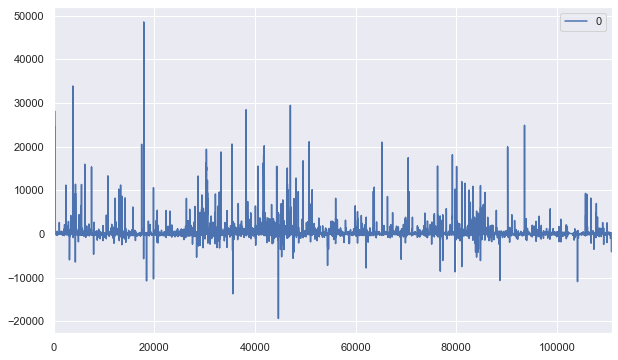

In [16]:
pd.DataFrame(yhat_ts1).plot()

<AxesSubplot:>

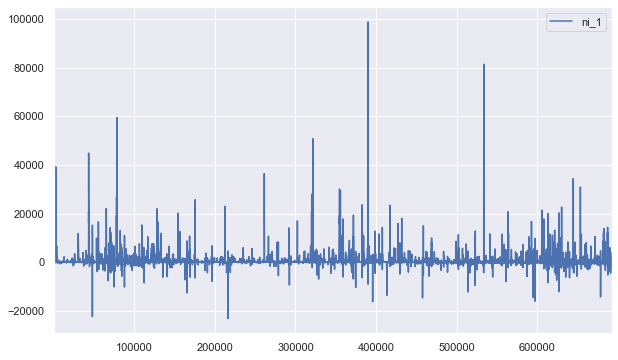

In [17]:
pd.DataFrame(y_ts1).plot()

In [18]:
def median_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) 

def median_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median((-(y_true - y_pred) / y_true)) 

pls1_in_mdape = median_absolute_percentage_error(y_tr1, yhat_tr1[:,0])
pls1_out_mdape = median_absolute_percentage_error(y_ts1, yhat_ts1[:,0])
pls1_in_mdpe = median_percentage_error(y_tr1, yhat_tr1[:,0])
pls1_out_mdpe = median_percentage_error(y_ts1, yhat_ts1[:,0])
print(pls1_in_mdape, pls1_out_mdape, pls1_in_mdpe, pls1_out_mdpe)

1.9201025822670457 0.8249316348975131 -0.2823249836080121 -0.24728701929828856


/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


['ib' 'pi' 'niadj' 'ni' 'ni_0' 'intan' 'dltt' 'pi_-1' 'ebit_-5' 'dvt'
 'ebit' 'ib_-1' 'dpc' 'dvt_-1' 'gp']


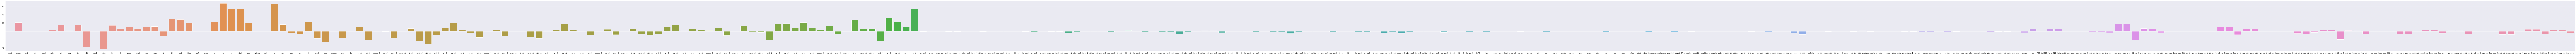

In [13]:
import seaborn as sns

print(np.asarray(list(X_ts1.keys()))[(np.abs(pls1.coef_[:,0]).argsort()[-15:][::-1])])
pls1.score(X_ts1, y_ts1)
sns.set(rc={'figure.figsize':(300,6)})
ax = sns.barplot(x=list(X_ts1.keys()), y=pls1.coef_[:,0])

['ib' 'pi' 'niadj' 'ni' 'ni_0' 'intan' 'dltt' 'pi_-1' 'ebit_-5' 'dvt'
 'ebit' 'ib_-1' 'dpc' 'dvt_-1' 'gp']


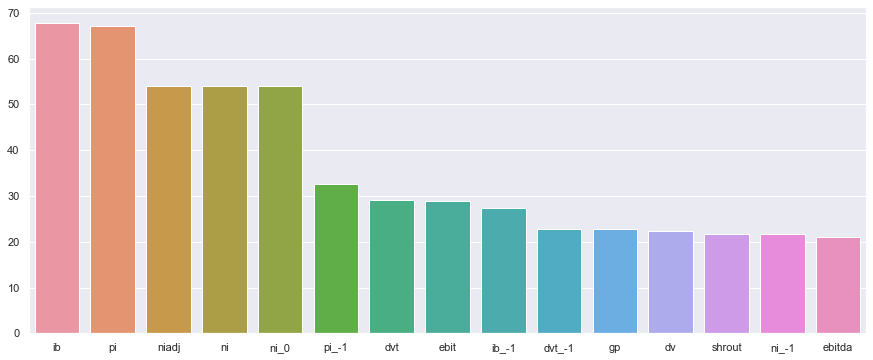

In [19]:
print(np.asarray(list(X_ts1.keys()))[(np.abs(pls1.coef_[:,0]).argsort()[-15:][::-1])])
pls1.score(X_ts1, y_ts1)
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(X_ts1.keys()))[pls1.coef_[:,0].argsort()[-15:][::-1]], y=(pls1.coef_[:,0][pls1.coef_[:,0].argsort()[-15:][::-1]]))

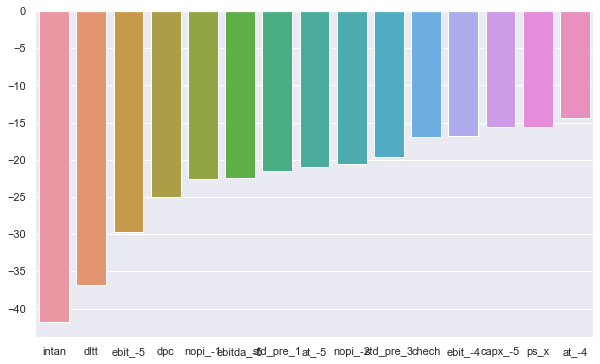

In [15]:
ax2 = sns.barplot(x=np.asarray(list(X_ts1.keys()))[(-pls1.coef_[:,0]).argsort()[-15:][::-1]], 
                  y=(pls1.coef_[:,0][(-pls1.coef_[:,0]).argsort()[-15:][::-1]]))

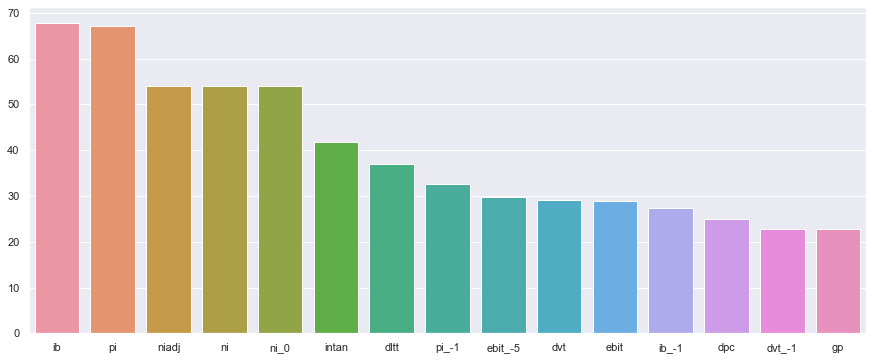

In [21]:
ax2 = sns.barplot(x=np.asarray(list(X_ts1.keys()))[np.abs(pls1.coef_[:,0]).argsort()[-15:][::-1]], 
                  y=(np.abs(pls1.coef_[:,0])[np.abs(pls1.coef_[:,0]).argsort()[-15:][::-1]]))